In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import sobel, gaussian_filter
from matplotlib.colors import ListedColormap


%matplotlib widget

In [2]:
D = np.array([
    [0, 5, 2, 9, 4, 1, 7, 11, 15, 3],
    [5, 0, 3, 4, 1, 4, 2, 6, 10, 2],
    [2, 3, 0, 7, 2, 1, 5, 9, 13, 1],
    [9, 4, 7, 0, 5, 8, 2, 2, 6, 6],
    [4, 1, 2, 5, 0, 3, 3, 7, 11, 1],
    [1, 4, 1, 8, 3, 0, 6, 10, 14, 2],
    [7, 2, 5, 2, 3, 6, 0, 4, 8, 4],
    [11, 6, 9, 2, 7, 10, 4, 0, 4, 8],
    [15, 10, 13, 6, 11, 14, 8, 4, 0, 12],
    [3, 2, 1, 6, 1, 2, 4, 8, 12, 0]
])

#### Behavior of Function When Fixing One Variable
This section plots the objective function when one variable is fixed. We have shown that fixing $x_1$ would result in two distinct optima. Now we want to know if fixing $x_2$ or $x_3$ would yield such result.

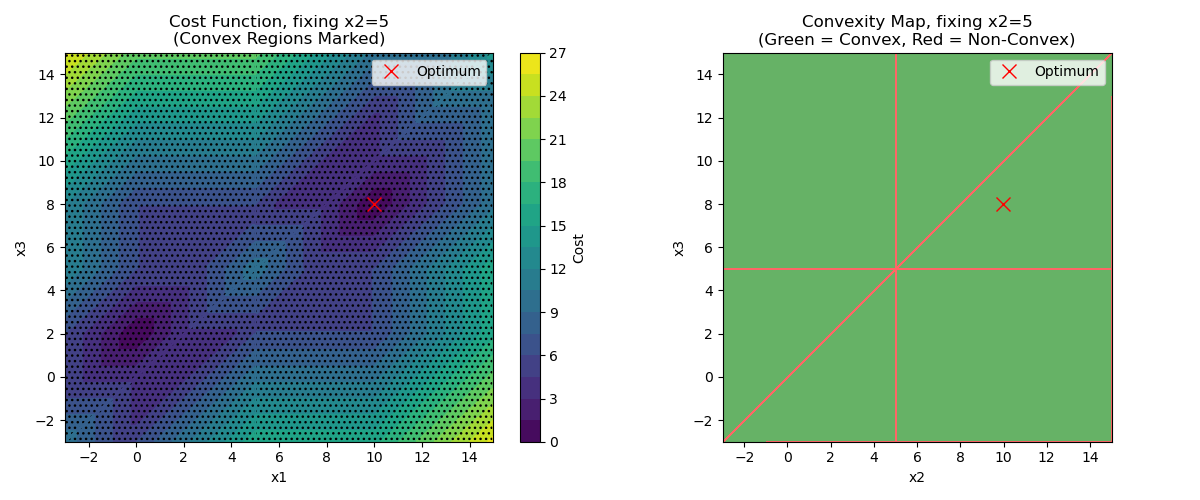

In [3]:
# Fixing x2
x2 = 5
x_guess = np.linspace(-3, 15, 1000)
y_guess = np.linspace(-3, 15, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

d12 = np.abs(X - x2)
d13 = np.abs(X - Y)
d23 = np.abs(x2 - Y)
cost = np.abs(d12 - D[0,1]) + np.abs(d13 - D[0,2]) + np.abs(d23 - D[1,2])

cost_smooth = gaussian_filter(cost, sigma=1)

dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  

min_idx = np.unravel_index(np.argmin(cost_smooth), cost_smooth.shape)
x1_opt = X[min_idx]
x3_opt = Y[min_idx]
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)
plt.plot(x1_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.title("Cost Function, fixing x2=5\n(Convex Regions Marked)")
plt.xlabel("x1")
plt.ylabel("x3")
plt.legend()

plt.subplot(122)
plt.imshow(convex_region, 
           extent=[x_guess.min(), x_guess.max(), y_guess.min(), y_guess.max()],
           origin='lower', 
           cmap=ListedColormap(['red', 'green']),
           alpha=0.6,
           interpolation='nearest')

plt.plot(x1_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.title("Convexity Map, fixing x2=5\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x2")
plt.ylabel("x3")
plt.legend()

plt.tight_layout()
plt.savefig('plots/var_x2_5.png', dpi=300, bbox_inches='tight')
plt.show()

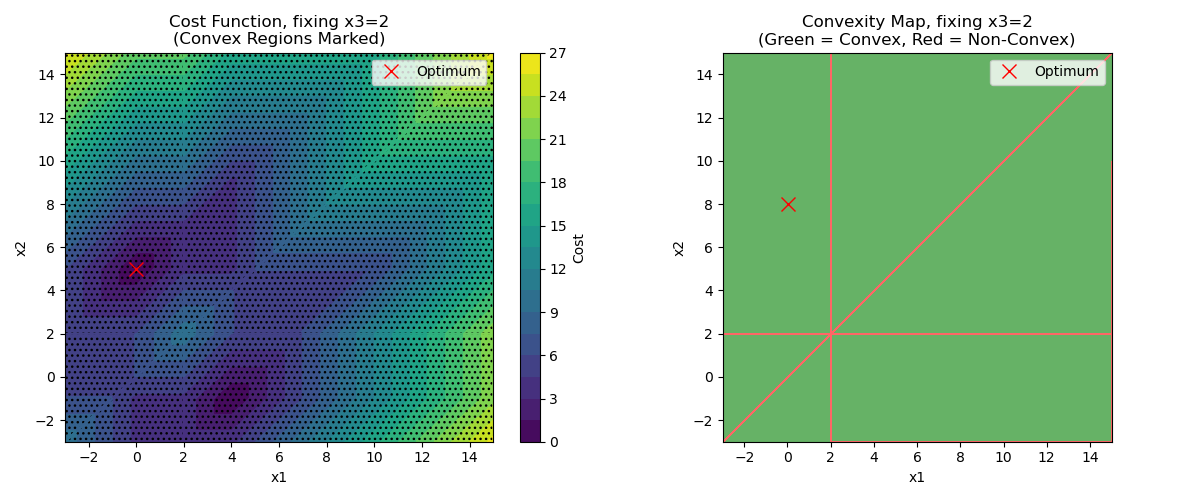

In [4]:
# Fixing x3
x3 = 2
x_guess = np.linspace(-3, 15, 1000)
y_guess = np.linspace(-3, 15, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

d12 = np.abs(X - Y)
d13 = np.abs(X - x3)
d23 = np.abs(Y - x3)
cost = np.abs(d12 - D[0,1]) + np.abs(d13 - D[0,2]) + np.abs(d23 - D[1,2])

cost_smooth = gaussian_filter(cost, sigma=1)

dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  

min_idx = np.unravel_index(np.argmin(cost_smooth), cost_smooth.shape)
x1_opt = X[min_idx]
x2_opt = Y[min_idx]
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)
plt.plot(x1_opt, x2_opt, 'rx', markersize=10, label='Optimum')
plt.title("Cost Function, fixing x3=2\n(Convex Regions Marked)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.subplot(122)
plt.imshow(convex_region, 
           extent=[x_guess.min(), x_guess.max(), y_guess.min(), y_guess.max()],
           origin='lower', 
           cmap=ListedColormap(['red', 'green']),
           alpha=0.6,
           interpolation='nearest')

plt.plot(x1_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.title("Convexity Map, fixing x3=2\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.tight_layout()
plt.savefig('plots/var_x3_2.png', dpi=300, bbox_inches='tight')
plt.show()

This result indicates that once two variables are fixed, the function admits precisely two optimal solutions. It implies that, in three-dimensional (or higher-dimensional) space, the global optima are confined to two distinct regions — conceptually, one might visualize them as two parallel "cigars" suspended in space.

#### Projection to 2D space
To better understand the spatial structure of the global optima, we project the high-dimensional cost function onto a two-dimensional subspace defined by selected variables. This reveals lower-dimensional patterns that suggest the presence of two parallel optimal regions.

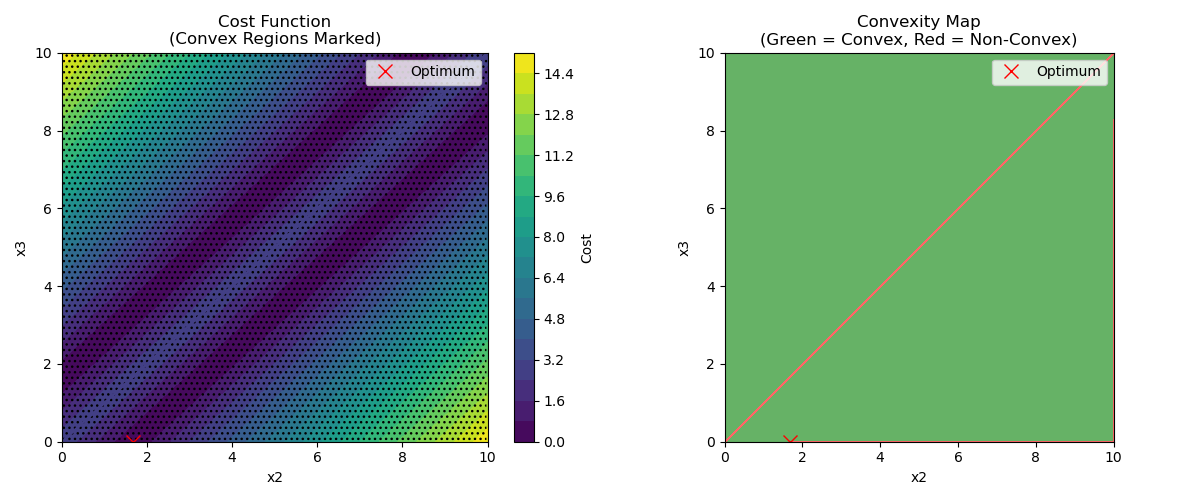

In [5]:
# On x2-x3 plane
x_guess = np.linspace(0, 10, 1000)
y_guess = np.linspace(0, 10, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

d23 = np.abs(X - Y)
cost = np.abs(d12 - D[1,2])

cost_smooth = gaussian_filter(cost, sigma=1)

dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  

min_idx = np.unravel_index(np.argmin(cost_smooth), cost_smooth.shape)
x2_opt = X[min_idx]
x3_opt = Y[min_idx]
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)
plt.plot(x2_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.title("Cost Function\n(Convex Regions Marked)")
plt.xlabel("x2")
plt.ylabel("x3")
plt.legend()

plt.subplot(122)
plt.imshow(convex_region, 
           extent=[x_guess.min(), x_guess.max(), y_guess.min(), y_guess.max()],
           origin='lower', 
           cmap=ListedColormap(['red', 'green']),
           alpha=0.6,
           interpolation='nearest')

plt.plot(x2_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.title("Convexity Map\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x2")
plt.ylabel("x3")
plt.legend()

plt.tight_layout()
plt.savefig('plots/fix_none_23.png', dpi=300, bbox_inches='tight')
plt.show()

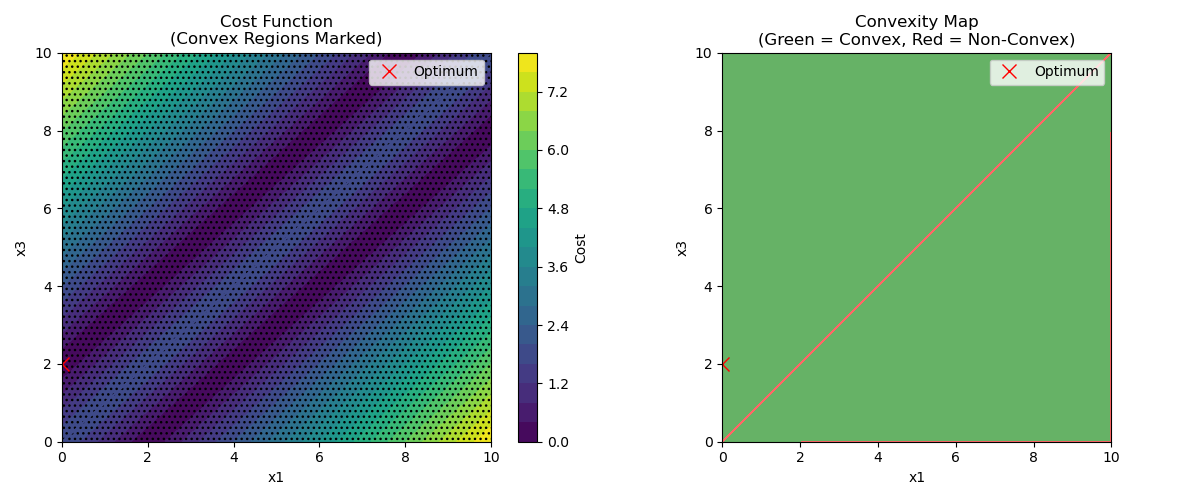

In [6]:
# On x1-x3 plane
x_guess = np.linspace(0, 10, 1000)
y_guess = np.linspace(0, 10, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

d13 = np.abs(X - Y)
cost = np.abs(d13 - D[0,2])

cost_smooth = gaussian_filter(cost, sigma=1)

dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  

min_idx = np.unravel_index(np.argmin(cost_smooth), cost_smooth.shape)
x1_opt = X[min_idx]
x3_opt = Y[min_idx]
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)
plt.plot(x1_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.title("Cost Function\n(Convex Regions Marked)")
plt.xlabel("x1")
plt.ylabel("x3")
plt.legend()

plt.subplot(122)
plt.imshow(convex_region, 
           extent=[x_guess.min(), x_guess.max(), y_guess.min(), y_guess.max()],
           origin='lower', 
           cmap=ListedColormap(['red', 'green']),
           alpha=0.6,
           interpolation='nearest')

plt.plot(x1_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.title("Convexity Map\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x1")
plt.ylabel("x3")
plt.legend()

plt.tight_layout()
plt.savefig('plots/fix_none_13.png', dpi=300, bbox_inches='tight')
plt.show()

#### Analysis on Fixing Two Variables
This section is made to prove that once two variables are fixed (regardless of the order), the function would only yield one unique solution

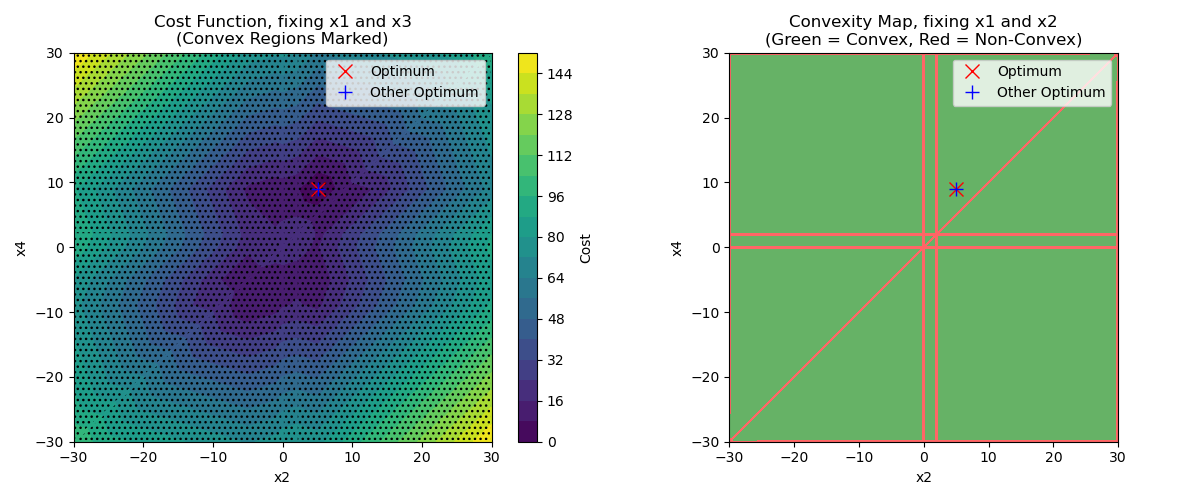

In [9]:
# fixing x1 and x3, guess on x2 and x4
x1 = 0
x3 = 2

# x2
x_guess = np.linspace(-30, 30, 1000)
# x4
y_guess = np.linspace(-30, 30, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

d12 = np.abs(x1 - X)
d13 = np.abs(x1 - x3)
d14 = np.abs(x1 - Y)
d23 = np.abs(X - x3)
d24 = np.abs(X - Y)
d34 = np.abs(x3 - Y)


cost = (np.abs(d12 - D[0,1]) +
        np.abs(d13 - D[0,2]) + 
        np.abs(d14 - D[0,3]) + 
        np.abs(d23 - D[1,2]) +
        np.abs(d24 - D[1,3]) +
        np.abs(d34 - D[2,3]))

cost_smooth = gaussian_filter(cost, sigma=1)

dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  

min_idx = np.unravel_index(np.argmin(cost_smooth), cost_smooth.shape)
x2_opt = X[min_idx]
x4_opt = Y[min_idx]

# Flatten the cost array
flat_cost = cost_smooth.flatten()

# Get indices of sorted cost values
sorted_indices = np.argsort(flat_cost)

# Get the index of the second smallest value
second_min_flat_index = sorted_indices[1]

# Convert flat index back to 2D coordinates
second_min_idx = np.unravel_index(second_min_flat_index, cost_smooth.shape)

# Extract values at that position
x2_opt_2 = X[second_min_idx]
x4_opt_2 = Y[second_min_idx]

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)
plt.plot(x2_opt, x4_opt, 'rx', markersize=10, label='Optimum')
plt.plot(x2_opt_2, x4_opt_2, 'b+', markersize=10, label='Other Optimum')

plt.title("Cost Function, fixing x1 and x3\n(Convex Regions Marked)")
plt.xlabel("x2")
plt.ylabel("x4")
plt.legend()

plt.subplot(122)
plt.imshow(convex_region, 
           extent=[x_guess.min(), x_guess.max(), y_guess.min(), y_guess.max()],
           origin='lower', 
           cmap=ListedColormap(['red', 'green']),
           alpha=0.6,
           interpolation='nearest')

plt.plot(x2_opt, x4_opt, 'rx', markersize=10, label='Optimum')
plt.plot(x2_opt_2, x4_opt_2, 'b+', markersize=10, label='Other Optimum')

plt.title("Convexity Map, fixing x1 and x3\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x2")
plt.ylabel("x4")
plt.legend()

plt.tight_layout()
plt.savefig('plots/var_fix_13.png', dpi=300, bbox_inches='tight')
plt.show()

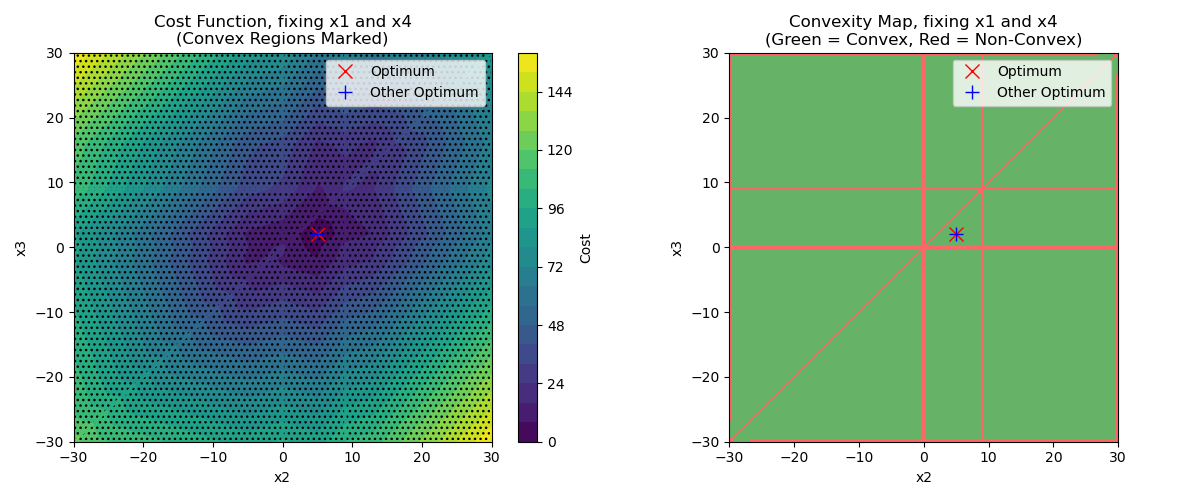

In [12]:
# fixing x1 and x4, guess on x2 and x3
x1 = 0
x4 = 9

# x2
x_guess = np.linspace(-30, 30, 1000)
# x3
y_guess = np.linspace(-30, 30, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

d12 = np.abs(x1 - X)
d13 = np.abs(x1 - Y)
d14 = np.abs(x1 - x4)
d23 = np.abs(X - Y)
d24 = np.abs(X - x4)
d34 = np.abs(Y - x4)


cost = (np.abs(d12 - D[0,1]) +
        np.abs(d13 - D[0,2]) + 
        np.abs(d14 - D[0,3]) + 
        np.abs(d23 - D[1,2]) +
        np.abs(d24 - D[1,3]) +
        np.abs(d34 - D[2,3]))

cost_smooth = gaussian_filter(cost, sigma=1)

dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  

min_idx = np.unravel_index(np.argmin(cost_smooth), cost_smooth.shape)
x2_opt = X[min_idx]
x3_opt = Y[min_idx]

# Flatten the cost array
flat_cost = cost_smooth.flatten()

# Get indices of sorted cost values
sorted_indices = np.argsort(flat_cost)

# Get the index of the second smallest value
second_min_flat_index = sorted_indices[1]

# Convert flat index back to 2D coordinates
second_min_idx = np.unravel_index(second_min_flat_index, cost_smooth.shape)

# Extract values at that position
x2_opt_2 = X[second_min_idx]
x3_opt_2 = Y[second_min_idx]

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)
plt.plot(x2_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.plot(x2_opt_2, x3_opt_2, 'b+', markersize=10, label='Other Optimum')

plt.title("Cost Function, fixing x1 and x4\n(Convex Regions Marked)")
plt.xlabel("x2")
plt.ylabel("x3")
plt.legend()

plt.subplot(122)
plt.imshow(convex_region, 
           extent=[x_guess.min(), x_guess.max(), y_guess.min(), y_guess.max()],
           origin='lower', 
           cmap=ListedColormap(['red', 'green']),
           alpha=0.6,
           interpolation='nearest')

plt.plot(x2_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.plot(x2_opt_2, x3_opt_2, 'b+', markersize=10, label='Other Optimum')

plt.title("Convexity Map, fixing x1 and x4\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x2")
plt.ylabel("x3")
plt.legend()

plt.tight_layout()
plt.savefig('plots/var_fix_14.png', dpi=300, bbox_inches='tight')
plt.show()

The script below plots all possible combinations of fixing two variables in [$x_1$,$x_4$]. Every plot indicates that there is only one optimal solution.

In [13]:
from matplotlib.colors import ListedColormap
from scipy.ndimage import gaussian_filter, sobel
import os


# Variable indices
vars = [0, 1, 2, 3]

# Fixed value for variables (you can customize these)
fixed_values = [0, 5, 2, 9]

# Generate plots for all combinations of 2 fixed and 2 variable
from itertools import combinations

for fixed in combinations(vars, 2):
    # Get indices of variables to guess
    var_indices = [i for i in vars if i not in fixed]

    # Assign fixed values
    x_fixed = [None] * 4
    x_fixed[fixed[0]] = fixed_values[fixed[0]]
    x_fixed[fixed[1]] = fixed_values[fixed[1]]

    # Guessed variable grid
    guess_range = np.linspace(-30, 30, 1000)
    X, Y = np.meshgrid(guess_range, guess_range)

    x = [None] * 4
    for i in range(4):
        if i == var_indices[0]:
            x[i] = X
        elif i == var_indices[1]:
            x[i] = Y
        else:
            x[i] = x_fixed[i]

    # Compute pairwise distances
    d = lambda i, j: np.abs(x[i] - x[j])
    cost = (np.abs(d(0, 1) - D[0, 1]) +
            np.abs(d(0, 2) - D[0, 2]) +
            np.abs(d(0, 3) - D[0, 3]) +
            np.abs(d(1, 2) - D[1, 2]) +
            np.abs(d(1, 3) - D[1, 3]) +
            np.abs(d(2, 3) - D[2, 3]))

    cost_smooth = gaussian_filter(cost, sigma=1)

    # Convexity check via second derivative approximation
    dx = sobel(cost_smooth, axis=0)
    dy = sobel(cost_smooth, axis=1)
    dxx = sobel(dx, axis=0)
    dxy = sobel(dx, axis=1)
    dyy = sobel(dy, axis=1)

    eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
    eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
    convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)

    # Find two lowest-cost optima
    flat_cost = cost_smooth.flatten()
    sorted_indices = np.argsort(flat_cost)
    min_idx = np.unravel_index(sorted_indices[0], cost_smooth.shape)
    second_min_idx = np.unravel_index(sorted_indices[1], cost_smooth.shape)

    x_opt = X[min_idx], Y[min_idx]
    x_opt2 = X[second_min_idx], Y[second_min_idx]

    # Plotting
    plt.figure(figsize=(12, 5))

    plt.subplot(121)
    plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
    plt.colorbar(label='Cost')
    plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', hatches=['...'], alpha=0)
    plt.plot(*x_opt, 'rx', markersize=10, label='Optimum')
    plt.plot(*x_opt2, 'b+', markersize=10, label='Other Optimum')
    plt.xlabel(f"x{var_indices[0]+1}")
    plt.ylabel(f"x{var_indices[1]+1}")
    plt.title(f"Cost Function, fixing x{fixed[0]+1} and x{fixed[1]+1}")
    plt.legend()

    plt.subplot(122)
    plt.imshow(convex_region,
               extent=[guess_range.min(), guess_range.max(), guess_range.min(), guess_range.max()],
               origin='lower',
               cmap=ListedColormap(['red', 'green']),
               alpha=0.6,
               interpolation='nearest')
    plt.plot(*x_opt, 'rx', markersize=10)
    plt.plot(*x_opt2, 'b+', markersize=10)
    plt.xlabel(f"x{var_indices[0]+1}")
    plt.ylabel(f"x{var_indices[1]+1}")
    plt.title(f"Convexity Map, fixing x{fixed[0]+1} and x{fixed[1]+1}\n(Green = Convex, Red = Non-Convex)")

    plt.tight_layout()
    fname = f"plots/experiment_var_fix_{fixed[0]+1}{fixed[1]+1}.png"
    plt.savefig(fname, dpi=300, bbox_inches='tight')
    plt.close()

print("All plots saved in 'plots/' directory.")


All plots saved in 'plots/' directory.
